## Introdução


---


A pandemia do Coronavírus vem deixando marcas de tragédias em muitas famílias, empresas e países. Isso não diferiria no mercado financeiro, onde a expectativa influencia as tomadas de decisão. Mudanças políticas, catástrofes mundiais, pandemias podem mudar as expectativas dos investidores sobre o futuro de alguns ativos financeiros, bolsas e empresas.

O Brasil viveu (e ainda vive) momentos perigosos nessa pandemia. Somos um dos países com maior número de casos a cada 1 milhão de habitantes, o segundo com o maior número de mortes. E ainda não temos um plano de vacinação. A incerteza no Brasil ainda é grande, e isso afeta o mercado. O mercado brasileiro viu o retorno sobre o patrimônio — um dos indicadores usados para medir o desempenho de uma empresa — cair ao longo dos meses durante essa pandemia.

O objetivo desse projeto é analisar o comportamento de alguns ativos. A análise será pelo preço e pelo retorno (que é interpretado a partir da volatilidade). Para isso, selecionei 5 ativos financeiros de diferentes setores (BANCO DO BRASIL, PETROBRÁS, GOL, MAGAZINE LUIZA e COGNA EDUCAÇÃO).

Aqui abrangemos banco, petróleo e gás, companhia aérea, varejo e educação.

**Sobre as instituições que analisaremos no mercado: (informações retiradas da Wikipédia)**

**Banco do Brasil S.A**: é uma instituição financeira brasileira, constituída na forma de sociedade de economia mista, com participação do Governo Federal do Brasil em 50% das ações.

**Petrobrás S.A**: é uma empresa de capital aberto, cujo acionista majoritário é o Governo do Brasil, sendo, portanto, uma empresa estatal de economia mista
Gol Linhas Aéreas Inteligentes: é uma companhia aérea brasileira sediada no Rio de Janeiro, fundada em 2001.

**Magazine Luiza**: é uma rede varejista de eletrônicos e móveis brasileira, fundada em 1957 na cidade de Franca pelo casal Pelegrino José Donato e sua esposa Luiza Trajano Donato.

**Cogna Educação**: é a nona maior empresa relacionada a educação do mundo. Foi fundada em 1966 em Belo Horizonte a partir da criação de uma empresa de cursos pré-vestibular chamada Pitágoras.

**Metodologia**

Utilizaremos técnicas de análise exploratória de dados para analisar os dados financeiros, como estatística descritiva e visualizações. Será uma investigação sobre o comportamento do mercado financeiro, então exploraremos alguns conceitos relacionado a esse tema.

A análise está dividida da seguinte maneira:

A primeira parte está reservada à análise dos preços ao longo do ano de 2020, exploraremos métricas simples como média, desvio padrão e correlação.

A segunda parte é dedicada a estudar a volatilidade (retorno) dos ativos financeiros. E utilizando as mesmas métricas da primeira parte do projeto, conseguiremos comparar as informações dos preços e da volatilidade.

A terceira parte é onde analisaremos o IBOVESPA, seus preços e volatilidade, e comparando com os ativos antes estudados. Verificaremos as correlações utilizando a descrição e a visualização.

Por último, vamos concluir nossa análise fazendo um apanhado geral dos dados obtidos e exibindo gráficos úteis para complementar tudo que foi estudado ao longo do texto.

**Dados**

Os dados foram obtidos a partir da biblioteca Pandas Data Reader, selecionando o *yahoo finance* como fonte.

## Bibliotecas

In [ ]:
#Bibliotecas necessárias
import pandas as pd
import math
from pandas_datareader import data, wb
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
!pip install mplfinance
import mplfinance as mpf
sns.set_style('white')
sns.despine(top=True, right=True)

<Figure size 640x480 with 0 Axes>

## Análise exploratoria de dados

In [ ]:
inicio = datetime.datetime(2020, 1, 1)
fim = datetime.datetime(2020, 12, 1)
tickers = ['BANCO DO BRASIL', 'PETROBRÁS', 'GOL', 'JBS', 'MAGAZINE LUIZA', 'COGNA EDUCAÇÃO']
BANCO_DO_BRASIL = data.DataReader('BBAS3.SA', "yahoo", inicio, fim)
PETROBRAS = data.DataReader('PETR4.SA', 'yahoo', inicio, fim)
GOL = data.DataReader('GOLL4.SA', 'yahoo', inicio, fim)
JBS = data.DataReader('JBSS3.SA', 'yahoo', inicio, fim)
LUIZA = data.DataReader('MGLU3.SA', 'yahoo', inicio, fim)
COGNA = data.DataReader('COGN3.SA','yahoo', inicio, fim)

ativos = pd.concat([BANCO_DO_BRASIL, PETROBRAS, GOL, JBS, MAGAZINE_LUIZA, COGNA_EDUCAÇÃO], axis=1, keys=tickers)
ativos.columns.names = ['Nome_ativo','Acontecimento']
ativos.head()

Nome_ativo    BANCO DO BRASIL             ... COGNA EDUCAÇÃO          
Acontecimento            High        Low  ...         Volume Adj Close
Date                                      ...                         
2020-01-02          53.970001  53.169998  ...     12730400.0     12.20
2020-01-03          53.910000  52.849998  ...     12593300.0     12.15
2020-01-06          53.400002  52.450001  ...      8944500.0     11.99
2020-01-07          53.029999  52.290001  ...      7579200.0     12.08
2020-01-08          52.990002  52.040001  ...      7866300.0     12.00

[5 rows x 36 columns]

In [ ]:
ativos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 228 entries, 2020-01-02 to 2020-12-01
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   (BANCO DO BRASIL, High)       228 non-null    float64
 1   (BANCO DO BRASIL, Low)        228 non-null    float64
 2   (BANCO DO BRASIL, Open)       228 non-null    float64
 3   (BANCO DO BRASIL, Close)      228 non-null    float64
 4   (BANCO DO BRASIL, Volume)     228 non-null    float64
 5   (BANCO DO BRASIL, Adj Close)  228 non-null    float64
 6   (PETROBRÁS, High)             228 non-null    float64
 7   (PETROBRÁS, Low)              228 non-null    float64
 8   (PETROBRÁS, Open)             228 non-null    float64
 9   (PETROBRÁS, Close)            228 non-null    float64
 10  (PETROBRÁS, Volume)           228 non-null    float64
 11  (PETROBRÁS, Adj Close)        228 non-null    float64
 12  (GOL, High)                   228 non-null   

## 1. Análise dos preços de cada ativo financeiro


---


Os preços numa economia de mercado estão sempre num movimento de sobe e desce, obedecendo a lei da oferta e demanda. No mercado financeiro isso não é diferente, o preço dos ativos estão sempre subindo e descendo, obedecendo a lei fundamental do mercado.

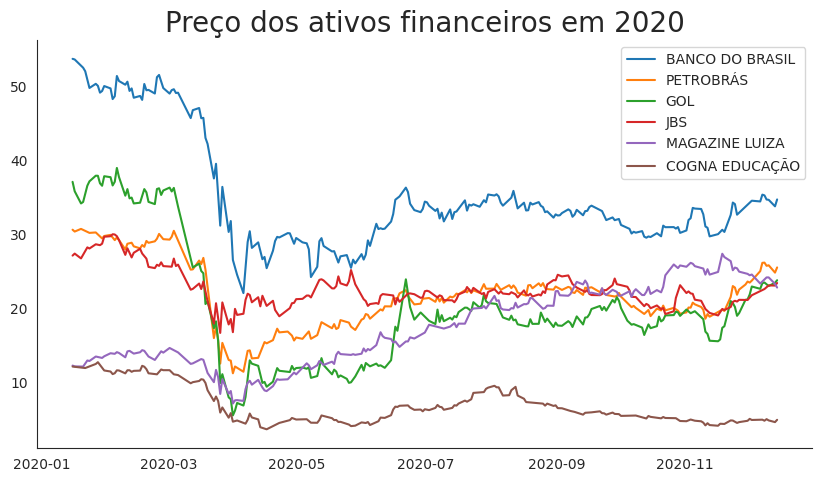

In [ ]:
for i in tickers:
  ativos[i]['Close'].plot(figsize=(10,6),legend=True, label=i)
  plt.title('Preço dos ativos financeiros em 2020', fontsize=20)
  sns.despine()
  plt.xlabel('')
  plt.xticks(rotation=360)
  sns.set_style('white')

Podemos observar que os preços caíram na mesma época do ano. O que será que aconteceu no início de março? Se formos lembrar, foi a época em que iniciaram os isolamentos sociais, os comércios fecharam, os números de mortes já começava a preocupar, e o mercado começou a tombar. As expectativas sobre a economia não eram muito boas no mundo inteiro, então ações começaram a se desvalorizar devido essa incerteza gerada pelo início da crise sanitária. Até aquele ponto, a sociedade e o mercado possuíam poucas informações sobre o que aconteceria nos próximos meses. A resposta do mercado foi no sentido das expectativas: para baixo!

Estatísticas descritivas dos fechamentos

In [ ]:
print(f'Fechamento mínimo: {ativos.xs(key="Close", axis=1, level="Acontecimento").min()}\n\nFechamento máximo: {ativos.xs(key="Close", axis=1, level="Acontecimento").max()}\n\nFechamendo médio:  {ativos.xs(key="Close", axis=1, level="Acontecimento").mean()}\n\nDesvio padrão:  {ativos.xs(key="Close", axis=1, level="Acontecimento").std()}')

Fechamento mínimo: Nome_ativo
BANCO DO BRASIL    22.129999
PETROBRÁS          11.290000
GOL                 5.600000
JBS                16.750000
MAGAZINE LUIZA      7.202500
COGNA EDUCAÇÃO      3.660000
dtype: float64

Fechamento máximo: Nome_ativo
BANCO DO BRASIL    53.799999
PETROBRÁS          30.809999
GOL                39.049999
JBS                30.090000
MAGAZINE LUIZA     27.450001
COGNA EDUCAÇÃO     12.790000
dtype: float64

Fechamendo médio:  Nome_ativo
BANCO DO BRASIL    35.124956
PETROBRÁS          21.852588
GOL                20.112763
JBS                22.667544
MAGAZINE LUIZA     17.554715
COGNA EDUCAÇÃO      6.949868
dtype: float64

Desvio padrão:  Nome_ativo
BANCO DO BRASIL    7.576887
PETROBRÁS          4.523735
GOL                8.099393
JBS                2.575328
MAGAZINE LUIZA     5.243695
COGNA EDUCAÇÃO     2.548553
dtype: float64


## Volatilidade

---

A volatilidade é uma variável que representa a frequência e intensidade oscilações no preço de um ativo num determinado período de tempo. Quanto maior a volatilidade, maior a variação do preço do ativo ativo. 
Mas a volatilidade vai além disso. Ela mostra se relaciona também com o próprio mercado. Os índices do mercado financeiro podem ser influenciados por uma série de fatores externos, como o cenário político, o otimismo e pessimismo dos investidores, ou uma **pandemia**.

Veremos agora, a volatilidade dos ativos financeiros que estamos analisando

In [ ]:
volatilidade = pd.DataFrame()
for tick in tickers:
  volatilidade[tick + '(volatilidade)'] = ativos[tick]['Close'].pct_change()
volatilidade.head()

,BANCO DO BRASIL(volatilidade),PETROBRÁS(volatilidade),GOL(volatilidade),JBS(volatilidade),MAGAZINE LUIZA(volatilidade),COGNA EDUCAÇÃO(volatilidade)
Date,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.001673,-0.008143,-0.034167,0.009926,-0.008920,-0.004098
2020-01-06,-0.013219,0.011823,-0.045961,-0.023662,0.000818,-0.013169
2020-01-07,-0.007547,-0.003895,0.005839,0.017897,-0.002861,0.007506
2020-01-08,-0.009125,-0.006191,0.039478,0.024542,0.030744,-0.006623


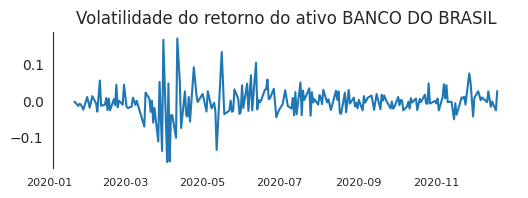

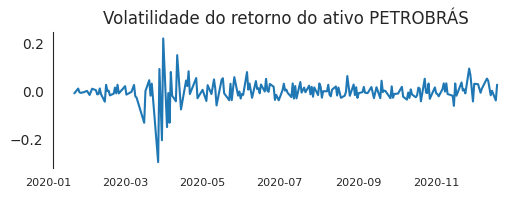

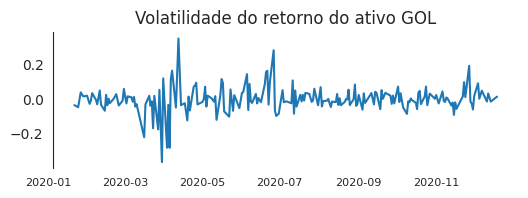

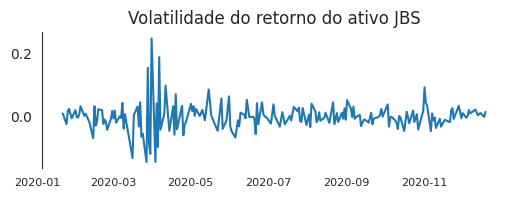

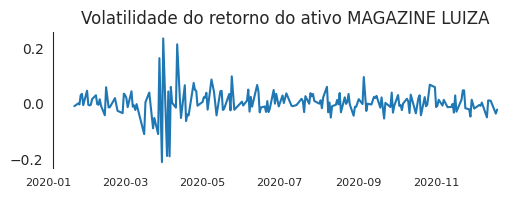

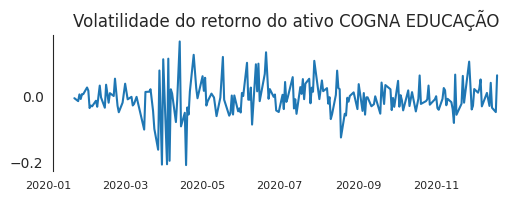

In [ ]:
for i in volatilidade.columns:
  plt.figure()
  volatilidade[i].plot(figsize=(6,2))
  plt.title(f'Volatilidade do retorno do ativo {str(i).strip("(volatilidade)")}')
  sns.despine(bottom=True)
  plt.xticks(fontsize=8, rotation=360)
  plt.xlabel('')

Como podemos observar, entre março e maio, as variações do preço do ativo foram muito mais intensas, e isso é representado pelas oscilações nos gráficos.
O que explica essa oscilação nessa intensidade?
A explicação mais plausível é que esse foi o período onde começaram os isolamentos sociais, e as quarentenas. Seguido do fechamento de comércios e muitos postos de trabalho

Descobrir o que aconteceu no dia da alta e baixa dos ativos

In [ ]:
print(f'Dias de baixa volatilidade:\n\n{volatilidade.idxmin()}\n\n\nDias de alta volatilidade\n\n{volatilidade.idxmax()}')

Dias de baixa volatilidade:

BANCO DO BRASIL(volatilidade)   2020-03-16
PETROBRÁS(volatilidade)         2020-03-09
GOL(volatilidade)               2020-03-12
JBS(volatilidade)               2020-03-09
MAGAZINE LUIZA(volatilidade)    2020-03-12
COGNA EDUCAÇÃO(volatilidade)    2020-03-31
dtype: datetime64[ns]


Dias de alta volatilidade

BANCO DO BRASIL(volatilidade)   2020-03-24
PETROBRÁS(volatilidade)         2020-03-13
GOL(volatilidade)               2020-03-25
JBS(volatilidade)               2020-03-13
MAGAZINE LUIZA(volatilidade)    2020-03-13
COGNA EDUCAÇÃO(volatilidade)    2020-03-26
dtype: datetime64[ns]


Observa-se que o dia com menor volatilidade for 16/03 e o dia com maior volatilidade foi 13/03. Foi justamente na época onde começamos a apertar o isolamento social, por volta do meado de março. O leitor ainda pode pesquisar no Google sobre notícias que aconteceram nesse dia.

## Médias móveis

---
A média móvel é uma métrica importante para analisar as mudanças no mercado. Com ela podemos ver a **tendência dos preços** dos ativos, facilitando a observação do comportamento durante todo o período de tempo. Ela nos dá uma suavização, o que torna muito mais atraente aos nosso olhos, simplificando a visualização e a informação.





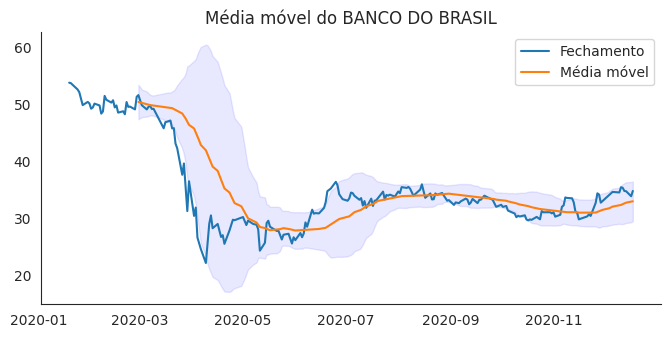

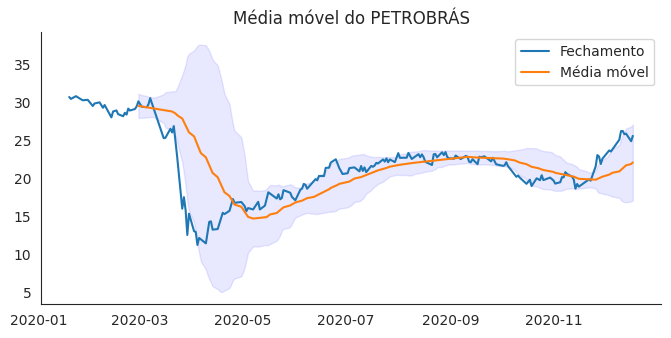

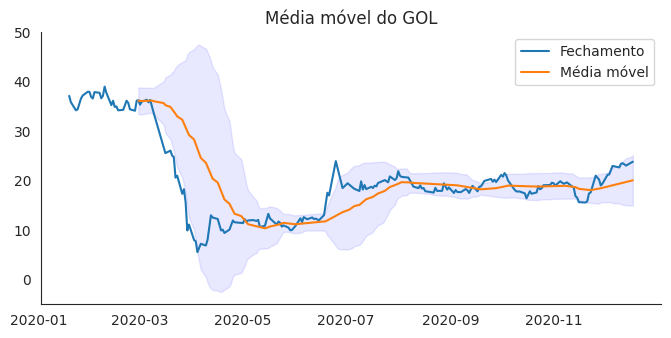

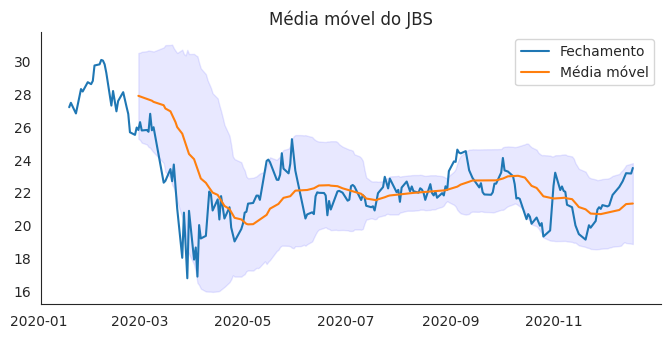

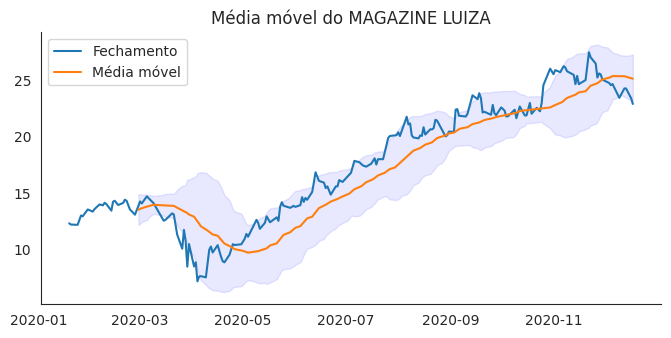

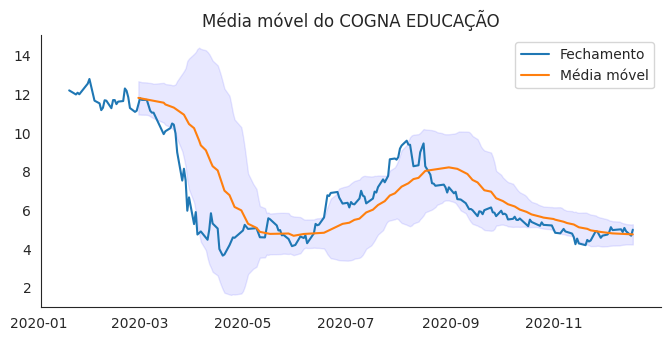

In [ ]:
for i in ativos.columns.levels[0]:
  ativos_2020_close = ativos[f'{i}']['Close'][ativos[f'{i}'].index.year == 2020]
  ativos_2020_open = ativos[f'{i}']['Open'][ativos[f'{i}'].index.year == 2020]
  ativos_2020_high = ativos[f'{i}']['High'][ativos[f'{i}'].index.year == 2020]
  ativos_2020_low = ativos[f'{i}']['Low'][ativos[f'{i}'].index.year == 2020]
  ativos_2020_volume = ativos[f'{i}']['Volume'][ativos[f'{i}'].index.year == 2020]

  media = ativos_2020_close.rolling(30).mean()
  std = ativos_2020_close.rolling(30).std()

  plt.figure(figsize=(8,4))
  ativos_2020_close.plot(label='Fechamento')
  media.plot(label='Média móvel')
  plt.fill_between(ativos_2020_close.index, media - 2 * std, media + 2 * std, color='b', alpha=0.09)#Dois desvios padroes da média
  plt.legend()
  sns.despine()
  plt.xlabel('')
  plt.xticks(rotation=360)
  plt.title(f'Média móvel do {f"{i}"}')

As oscilações maiores (em laranja) nos mostram os ciclos que se passaram no mercado durante esse ano, sendo no período de março a maior queda. De fato, a doença, o isolamento social (que foi necessário para conter o avanço da pandemia), as incertezas sobre o ano, as notícias sobre mortes e casos avançando cada vez mais, e todo o caos influenciaram as expectativas no mercado financeiro.
Podemos observar aqui, que a Magazine Luiza conseguiu decolar em meio a uma crise mundial. Quando analisarmos as correlações, ela terá correlação muito baixa/negativa com os demais ativos.

### Correlação entre a volatilidade

In [ ]:
volatilidade.corr()

,BANCO DO BRASIL(volatilidade),PETROBRÁS(volatilidade),GOL(volatilidade),JBS(volatilidade),MAGAZINE LUIZA(volatilidade),COGNA EDUCAÇÃO(volatilidade)
BANCO DO BRASIL(volatilidade),1.000000,0.750806,0.716272,0.478578,0.631068,0.663467
PETROBRÁS(volatilidade),0.750806,1.000000,0.662079,0.619493,0.620410,0.574735
GOL(volatilidade),0.716272,0.662079,1.000000,0.418915,0.567019,0.667844
JBS(volatilidade),0.478578,0.619493,0.418915,1.000000,0.644800,0.413532
MAGAZINE LUIZA(volatilidade),0.631068,0.620410,0.567019,0.644800,1.000000,0.559104
COGNA EDUCAÇÃO(volatilidade),0.663467,0.574735,0.667844,0.413532,0.559104,1.000000


Temos a maior correlação da volatilidade sendo entre BANCO DO BRASIL e PETROBRÁS, com 75,08% de correlação

Ainda conseguimos visualizar, de forma que a informação seja assimilada com mais facilidade. Faremos um mapa de calor para a correlação entre a volatilidade dos ativos financeiros.

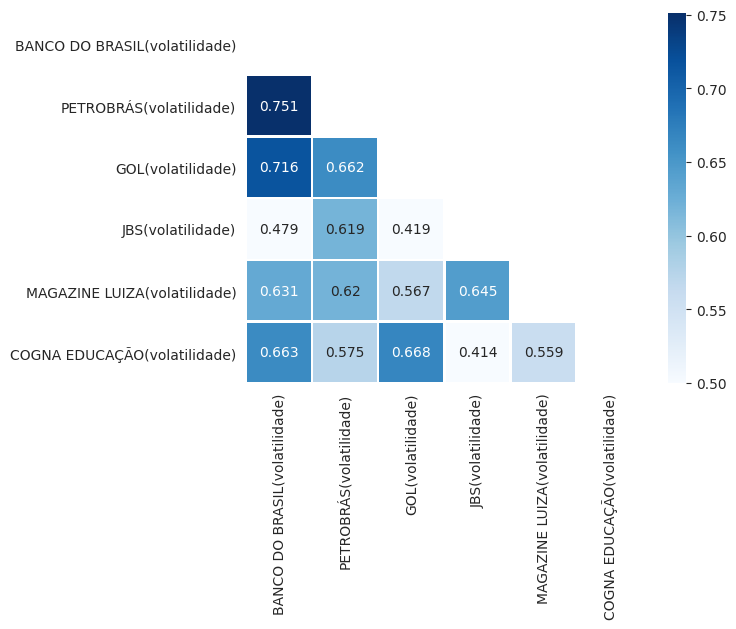

In [ ]:
mask = np.zeros_like(volatilidade.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(volatilidade.corr(), annot=True, cmap='Blues', vmin=0.5, linewidths=1, fmt='.3g', mask=mask);

Com um gráfico de dispersão podemos observar as mesmas informações de maneira diferente, nos dando mais uma percepção sobre a mesma informação.

Uma maneira simples e eficiente de fazer isso é usando o pairplot do seaborn.

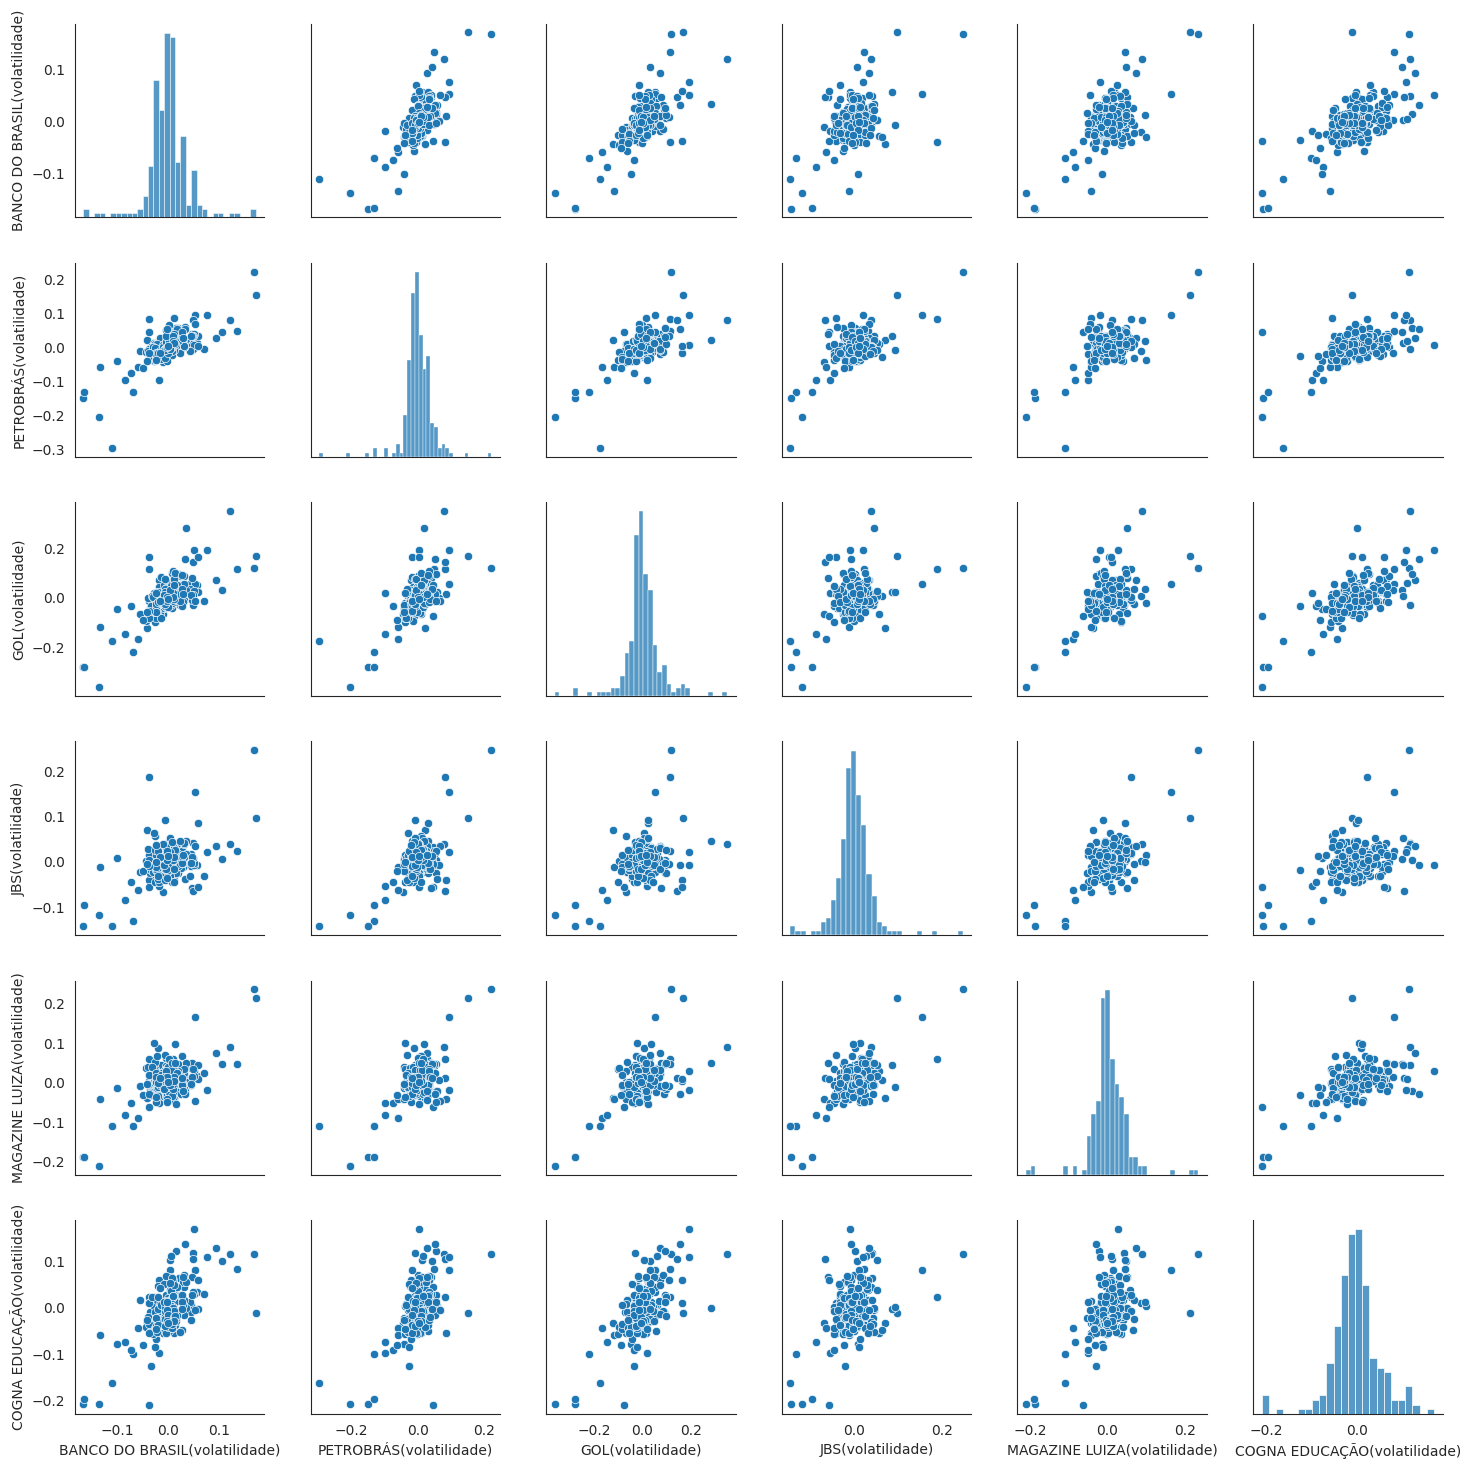

In [ ]:
sns.pairplot(volatilidade);

## Correlações

---
O quão correlacionadas estão essas volatilidades? Elas se acompanham? Positivamente ou negativamente?

Os ativos no mercado costumam se comportar de maneira similar em casos de crise ou de boom. Isso porque a economia vai perdendo ou ganhando como um todo, o que por sua vez reflete o resultado no mercado financeiro.

**Um guia para interpretar correlações:**

Utilizaremos a [correlação de Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson) nessa análise, ela se encaixa melhor com o objetivo do projeto.
* 1.0 positivo ou negativo indica uma correlação perfeita
* 0.9 positivo ou negativo indica uma correlação muito forte.
* 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
* 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
* 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
* 0.1 a 0.3 positivo ou negativo indica uma correlação desprezível.
* 0 indica uma correlação inexistente


### Correlação entre os preços

In [ ]:
preço_ativos = pd.DataFrame()
for i in tickers:
  preço_ativos[i + '(preço)'] = ativos[i]['Close']
preço_ativos.corr()

,BANCO DO BRASIL(preço),PETROBRÁS(preço),GOL(preço),JBS(preço),MAGAZINE LUIZA(preço),COGNA EDUCAÇÃO(preço)
BANCO DO BRASIL(preço),1.000000,0.887362,0.944757,0.776582,-0.193092,0.932344
PETROBRÁS(preço),0.887362,1.000000,0.941557,0.791868,0.153528,0.819807
GOL(preço),0.944757,0.941557,1.000000,0.814211,0.028115,0.867207
JBS(preço),0.776582,0.791868,0.814211,1.000000,-0.173979,0.762175
MAGAZINE LUIZA(preço),-0.193092,0.153528,0.028115,-0.173979,1.000000,-0.268463
COGNA EDUCAÇÃO(preço),0.932344,0.819807,0.867207,0.762175,-0.268463,1.000000


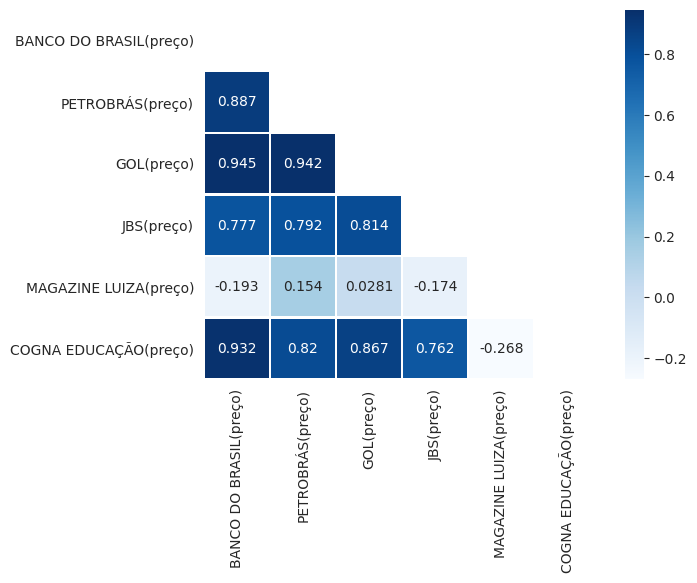

In [ ]:
mask = np.zeros_like(preço_ativos.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(preço_ativos.corr(), annot=True, cmap='Blues', fmt='.3g', linewidths=1, mask = mask)

Podemos observar aqui, uma correlação **muito alta entre:**

BANCO DO BRASIL e COGNA EDUCAÇÃO (0.932)

BANCO DO BRASIL e GOL (0.945)

PETROBRÁS e GOL (0.942);

**Alta entre:**

BANCO DO BRASIL e PETROBRÁS (0.887)

BANCO DO BRASIL e JBS (0.777)

PETROBRÁS e COGNA EDUCAÇÃO (0.82)

PETROBRÁS e JBS (0.792)

GOL e JBS (0.814)

GOL e COGNA EDUCAÇÃO (0.867)

JBS e COGNA EDUCAÇÃO (0.762)

**Desprezível/inexistente entre:**

MAGAZINE LUIZA e BANCO DO BRASIL (-0,193)

MAGAZINE LUIZA e PETROBRÁS (0,154)

MAGAZINE LUIZA e JBS (0,028)

MAGAZINE LUIZA e GOL (-0,174)

MAGAZINE LUIZA e COGNA EDUCAÇÃO (-0,268)

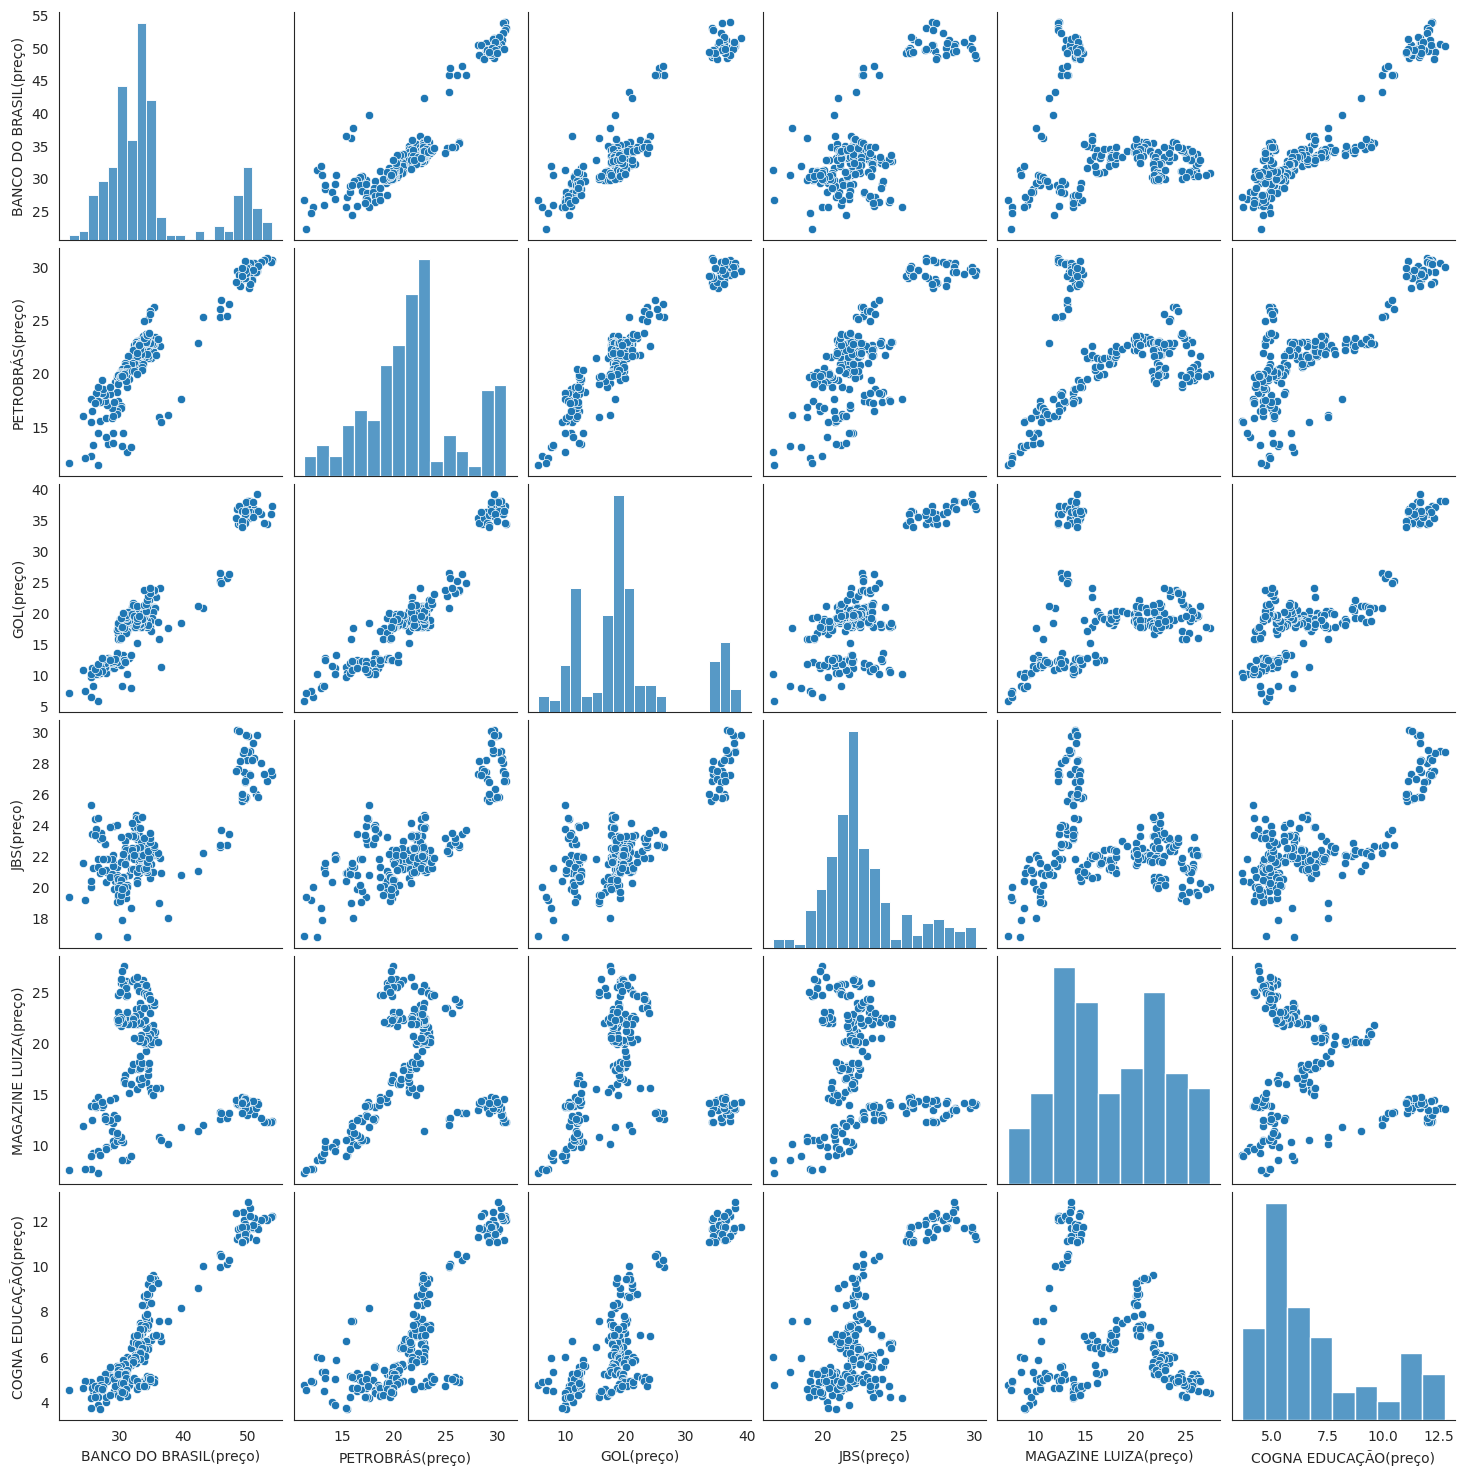

In [ ]:
sns.pairplot(preço_ativos)

## Análise do IBOVESPA

In [ ]:
IBOVESPA = data.DataReader('^BVSP', 'yahoo', inicio, fim)
IBOVESPA

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,118573.0,115649.0,115652.0,118573.0,5162700.0,118573.0
2020-01-03,118792.0,117341.0,118564.0,117707.0,6834500.0,117707.0
2020-01-06,117707.0,116269.0,117707.0,116878.0,6570000.0,116878.0
2020-01-07,117076.0,115965.0,116872.0,116662.0,4854100.0,116662.0
2020-01-08,117335.0,115693.0,116667.0,116247.0,5910500.0,116247.0
...,...,...,...,...,...,...
2020-11-25,110596.0,109315.0,109786.0,110133.0,8564700.0,110133.0
2020-11-26,110245.0,109418.0,110133.0,110227.0,6166800.0,110227.0
2020-11-27,111603.0,110161.0,110229.0,110575.0,8790300.0,110575.0


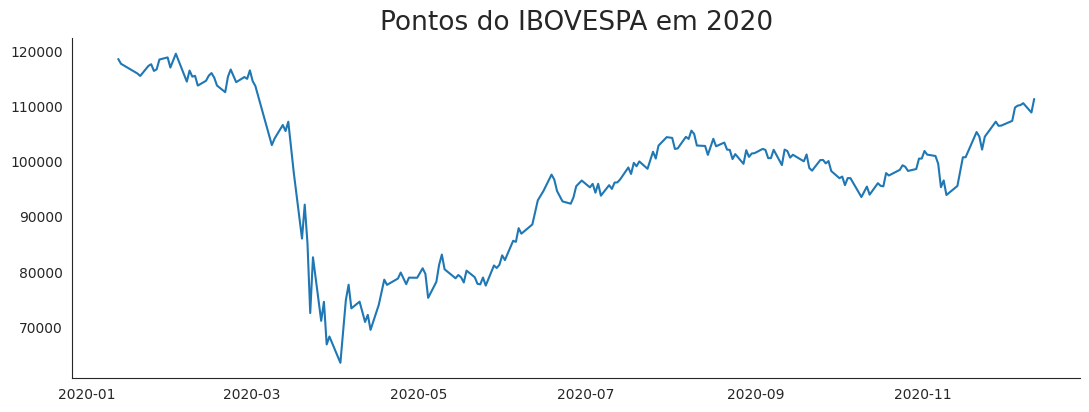

In [ ]:
IBOVESPA['Close'].plot(figsize=(13,5))
plt.xticks(rotation=360)
sns.despine()
plt.title('Pontos do IBOVESPA em 2020',fontsize=19)
plt.xlabel('');

Uma queda acentuada é notada no mesmo período de queda dos ativos financeiros que analisamos anteriormente

A volatilidade do IBOVESPA

Text(0.5, 0, '')

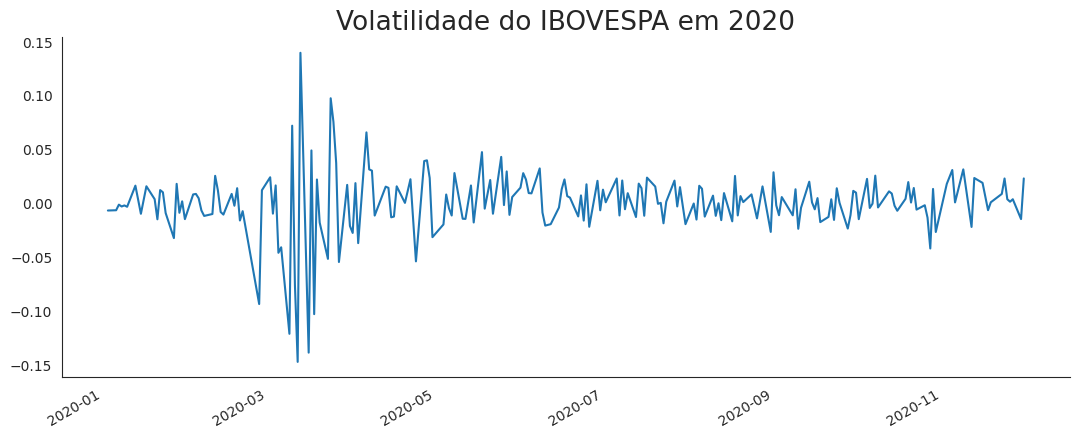

In [ ]:
IBOVESPA_volat = IBOVESPA['Close'].pct_change()
IBOVESPA_volat.plot(figsize=(13,5))
sns.despine()
plt.title('Volatilidade do IBOVESPA em 2020',fontsize=19)
plt.xlabel('')

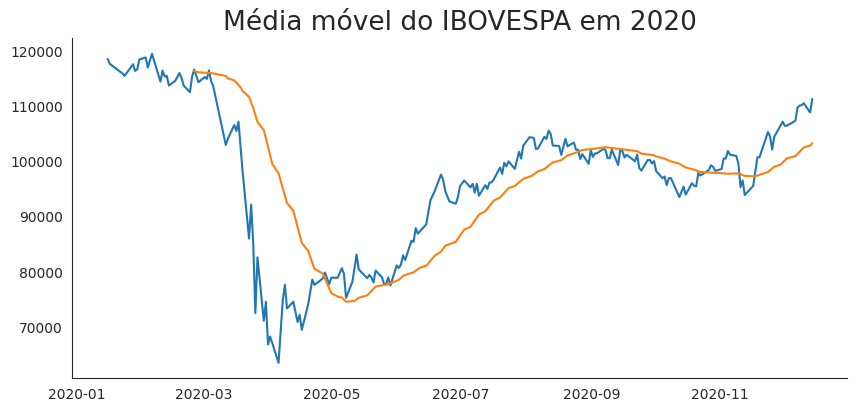

In [ ]:
IBOVESPA['Close'].plot()
IBOVESPA['Close'].rolling(30).mean().plot(figsize=(10,5))
plt.xticks(rotation=360)
plt.xlabel('')
plt.title('Média móvel do IBOVESPA em 2020', fontsize=19)
sns.despine()

In [ ]:
preço_corr = pd.DataFrame()
for i in tickers:
  preço_corr[i + 'corr'] = pd.Series(IBOVESPA['Close'].corr(ativos[i]['Close']))
preço_corr = preço_corr.dropna().T
preço_corr.columns = ['Correlação']
media = 0
for i in tickers:
  media += (IBOVESPA["Close"].corr(ativos[i]["Close"]))/len(tickers)
  desvio_padrao = preço_corr.std()
  print(f'Correlação do IBOVESPA COM {i}: {IBOVESPA["Close"].corr(ativos[i]["Close"]):.3f}')
print(f'\nCorrelação média: {media:.3f}\nDesvio padrão: {desvio_padrao}')

Correlação do IBOVESPA COM BANCO DO BRASIL: 0.810
Correlação do IBOVESPA COM PETROBRÁS: 0.949
Correlação do IBOVESPA COM GOL: 0.905
Correlação do IBOVESPA COM JBS: 0.671
Correlação do IBOVESPA COM MAGAZINE LUIZA: 0.392
Correlação do IBOVESPA COM COGNA EDUCAÇÃO: 0.731

Correlação média: 0.743
Desvio padrão: Correlação    0.200678
dtype: float64


A maior correlação se encontra com a Petrobrás (**0.949**), e a média em **0.743**. Ou seja, o IBOVESPA está muito mais correlacionado com Petrobrás do que com os bancos brasileiros. Isso porque o petróleo é a a fonte de energia mais utilizada no mundo, então é normal que o mercado financeiro acompanhe seus movimentos de preços. Veremos, em breve, essa correlação para a volatilidade, ou seja, para as oscilações dos preços.
Obtivemos também um desvio padrão de **0.2** em relação a média. Verificaremos se é maior ou menor que a da volatilidade.

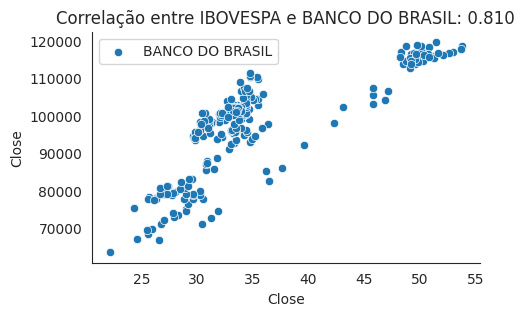

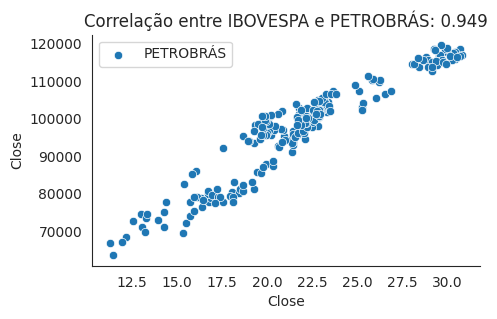

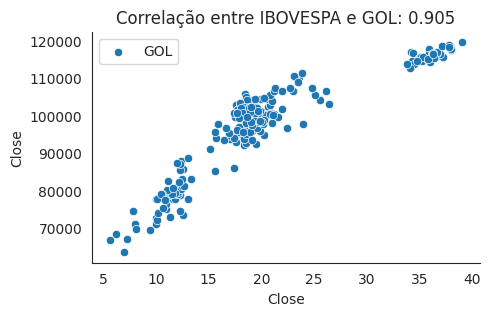

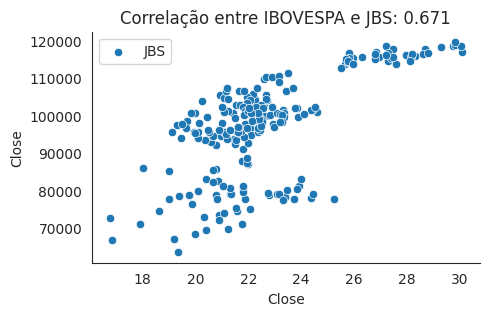

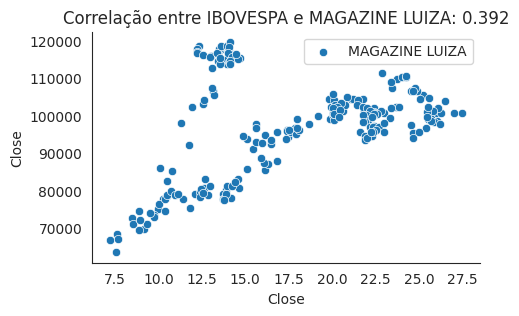

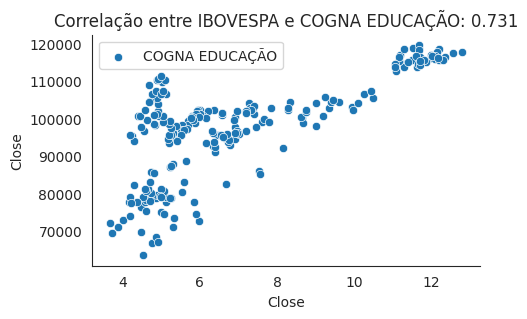

In [ ]:
for i in tickers:
  labels = [i, 'IBOVESPA']
  plt.figure(figsize=(5,3))
  sns.scatterplot(x=ativos[i]['Close'], y=IBOVESPA['Close'])
  plt.legend(labels)
  sns.despine()
  plt.title(f'Correlação entre IBOVESPA e {i}: {IBOVESPA["Close"].corr(ativos[i]["Close"]):.3f}')
  plt.show()

### Correlação da volatilidade

In [ ]:
volatilidade_corr = pd.DataFrame()
for i in volatilidade.columns:
  volatilidade_corr[i + 'corr'] = pd.Series(IBOVESPA_volat.corr(volatilidade[i]))
volatilidade_corr = volatilidade_corr.dropna().T
volatilidade_corr.columns = ['Correlação']
media = 0
for i in volatilidade.columns:
  media += (IBOVESPA_volat.corr(volatilidade[i])) /len(volatilidade.columns)
  desvio_padrao = volatilidade_corr.std()
  print(f'Correlação entre IBOVESPA e {i.strip("(volatilidade)")}: {IBOVESPA_volat.corr(volatilidade[i]):.3f}')
print(f'\nCorrelação média: {media:.3f}\nDesvio padrão da {desvio_padrao}')

Correlação entre IBOVESPA e BANCO DO BRASIL: 0.892
Correlação entre IBOVESPA e PETROBRÁS: 0.879
Correlação entre IBOVESPA e GOL: 0.760
Correlação entre IBOVESPA e JBS: 0.662
Correlação entre IBOVESPA e MAGAZINE LUIZA: 0.781
Correlação entre IBOVESPA e COGNA EDUCAÇÃO: 0.730

Correlação média: 0.784
Desvio padrão da Correlação    0.088399
dtype: float64


Os valores da correlação da volatilidade não mudam muito, ficam bem próximos da média (**0.784**), podemos ver isso olhando o desvio padrão (**0.088**).
O desvio padrão da volatilidade se mostrou menor que o dos preços, isso indica que ela se manteve muito mais próxima da média, estando mais estável ao longo do ano. Teve suas variações abruptas entre março e maio, porém as quedas do preço ao longo do ano variaram muito mais em torno da média.

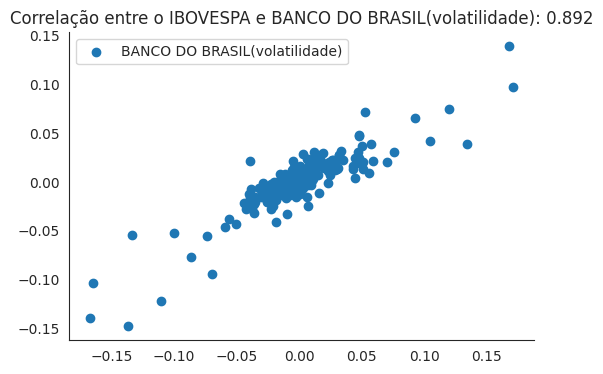

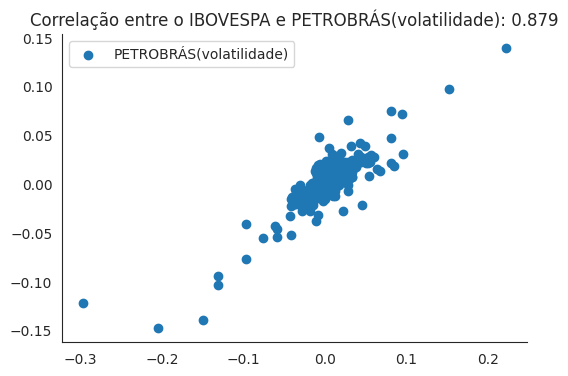

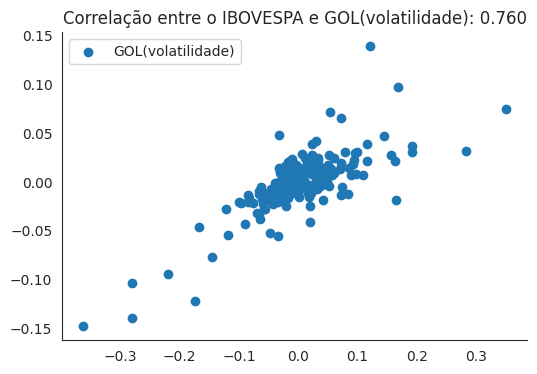

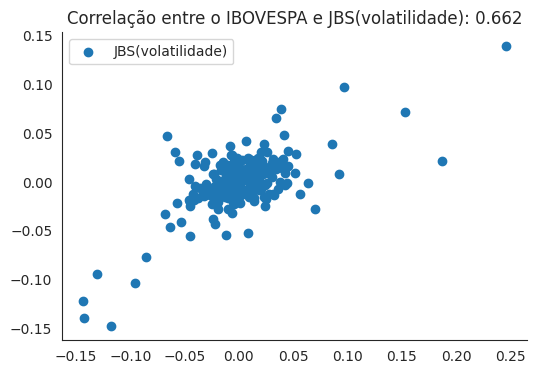

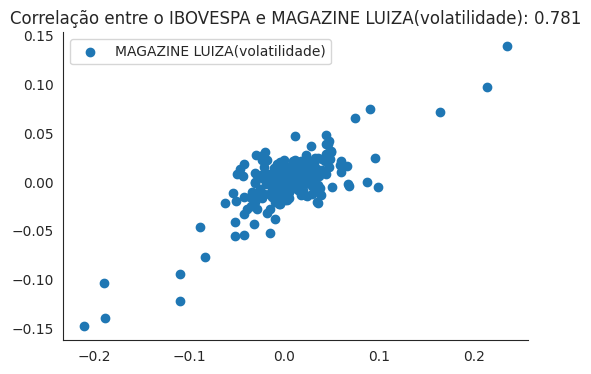

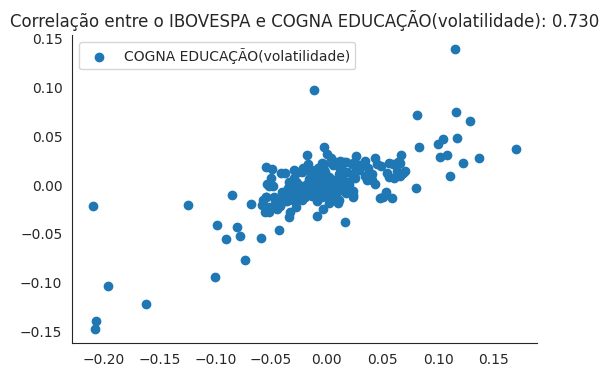

In [ ]:
for i in volatilidade.columns:
  labels = [i, 'IBOVESPA']
  plt.figure(figsize=(6,4))
  plt.scatter(x=volatilidade[i], y=IBOVESPA_volat)
  plt.legend(labels)
  sns.despine()
  plt.title(f'Correlação entre o IBOVESPA e {i}: {IBOVESPA_volat.corr(volatilidade[i]):.3f}')
  plt.show()

Nas oscilações de preços o IBOVESPA esteve mais correlacionado com o BANCO DO BRASIL nesse ano de 2020. Porém a diferença entre as correlações não foi muito grande

## Conclusão

---
Baseado na análise desse projeto, podemos concluir o que já era sabido: a crise do coronavírus abalou o mercado financeiro, causou incerteza por um determinado período de tempo, mas desde então se acalmou. Olhando as métricas, podemos ver que a bolsa de valores acompanhou o preço e a volatilidade de alguns ativos, ambos caindo no mesmo período, o período de maior incerteza e desinformação.
Estamos vivendo um momento ímpar, que veio devastando sistemas de saúde, vidas, famílias.

A educação parou, a vida de muita gente parou, empresas não resistiram, famílias se distanciaram. Uma análise sobre o mercado financeiro é muito pouco para buscar entender o que essa pandemia causou no Brasil e no mundo.

Agora com a vacina, estamos mais perto de controlar o contágio, e assim poderemos nos abraçar novamente, visitar parentes e amigos. E quando a estabilidade voltar, empresas ressurgirão, pais e filhos se encontrarão, mercados se reerguirão.

Abaixo, um gráfico de candlestick, que mostra a variação diária do preço no IBOVESPA

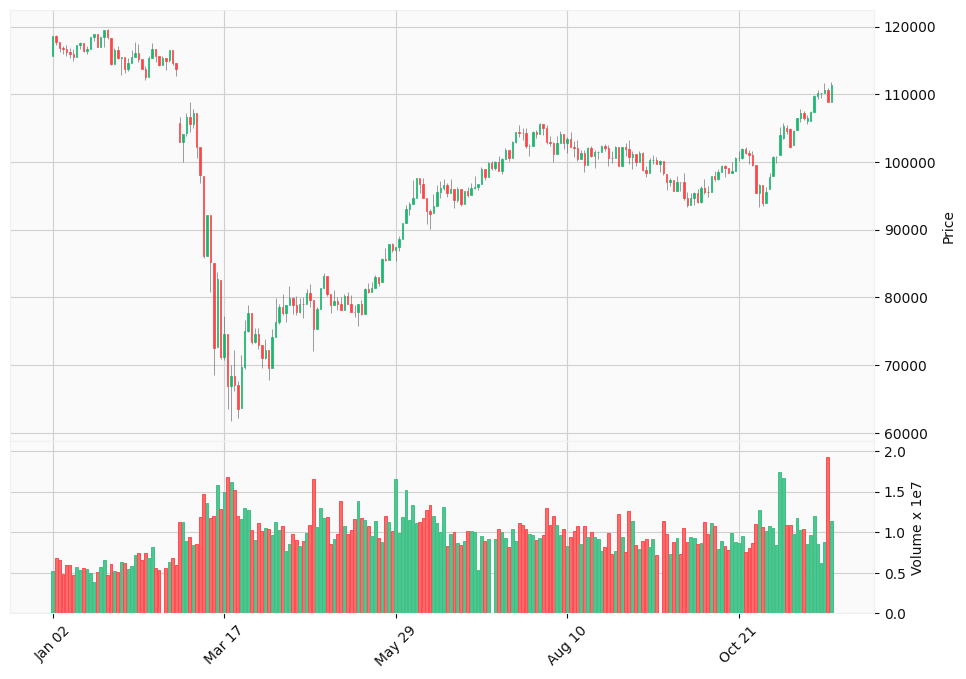

In [ ]:
mpf.plot(IBOVESPA, type='candle', style='yahoo', volume=True, figscale=1.5)